<h3>问题一</h3>

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import torch
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(2333)

In [3]:
# acc: 0.95
def SVM(X_train, y_train, X_test, y_test):
    clf = SVC(kernel='rbf')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("预测结果:", y_pred)
    print("实际结果:", y_test)
    mismatch = np.where(y_pred != y_test)
    print("预测与实际不符的索引：", mismatch[0]) 
    print("模型准确率:", accuracy_score(y_test, y_pred))

In [499]:
def RF(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(n_estimators=100, max_depth=17, random_state=42)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("预测结果:", y_pred)
    print("实际结果:", y_test)
    mismatch = np.where(y_pred != y_test)
    print("预测与实际不符的索引：", mismatch[0])
    for i in mismatch[0]:
        print('gt:', y_test[i], 'pred:', y_pred[i], 'idx:', i)
    print("模型准确率:", accuracy_score(y_test, y_pred))
    return y_pred, clf

In [3]:
df = pd.read_excel('附件一（训练集）.xlsx', sheet_name=None)

In [4]:
df1, df2, df3, df4 = df['材料1'], df['材料2'], df['材料3'], df['材料4']
df1['材料'] = 1
df2['材料'] = 2
df3['材料'] = 3
df4['材料'] = 4
train_test = pd.concat([df1, df2, df3, df4], axis=0)
train_test = train_test.replace({'正弦波': 1, '三角波': 2, '梯形波': 3})
# X, y = train_test.loc[:, 0:'材料'], train_test.loc[:, '励磁波形']
# train_test = train_test.sample(frac=1).reset_index(drop=True)
# l = len(train_test)
# print(train_test.head(), l)
# train = train_test.iloc[:int(l*0.8)]
# test = train_test.iloc[int(l*0.8):]
# print(len(train), len(test))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, y_train = train.loc[:, 0:'材料'], train.loc[:, '励磁波形']
# X_test, y_test = test.loc[:, 0:'材料'], test.loc[:, '励磁波形']
# y_train = y_train.replace({'正弦波': 1, '三角波': 2, '梯形波': 3})
# y_test = y_test.replace({'正弦波': 1, '三角波': 2, '梯形波': 3})
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

0       0.000213
1       0.000389
2       0.000566
3       0.000743
4       0.000919
          ...   
1019   -0.000669
1020   -0.000492
1021   -0.000316
1022   -0.000140
1023    0.000036
Name: 0, Length: 1024, dtype: float64


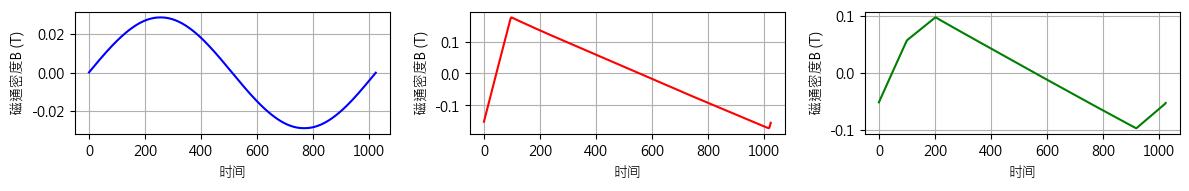

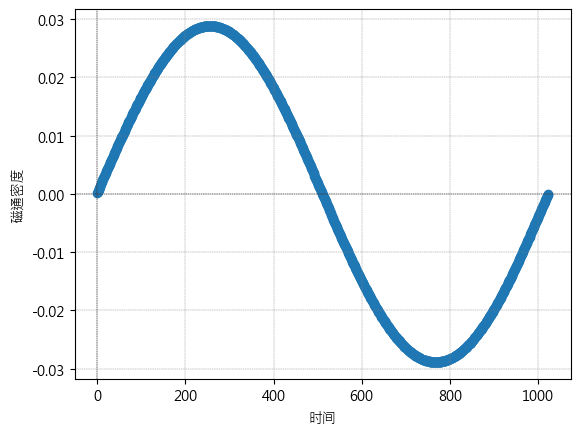

In [404]:
import matplotlib.font_manager as fm

font_path = 'D:/数模2024/字体/Microsoft JhengHei.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

s1 = df1.loc[:, 0:1023]
print(s1.iloc[0])
x = s1.iloc[0].index
y1 = s1.iloc[0]
y2 = s1.iloc[1071]
y3 = s1.iloc[2374]

fig, axs = plt.subplots(1, 3, figsize=(12, 2))

# 绘制第一个子图
axs[0].plot(x, y1, color='b')
axs[0].set_ylabel('磁通密度B (T)')
axs[0].set_xlabel('时间')
axs[0].grid(True)

# 绘制第二个子图
axs[1].plot(x, y2, color='r')
axs[1].set_ylabel('磁通密度B (T)')
axs[1].set_xlabel('时间')
axs[1].grid(True)

# 绘制第三个子图
axs[2].plot(x, y3, color='g')
axs[2].set_ylabel('磁通密度B (T)')
axs[2].set_xlabel('时间')
axs[2].grid(True)

# 调整布局
plt.tight_layout()
plt.show()
plt.scatter(s1.iloc[0].index, s1.iloc[0])

# 添加标签和标题
plt.xlabel('时间')
plt.ylabel('磁通密度')
# plt.title('时间 vs 磁通密度的散点图')

plt.axhline(0, color='black',linewidth=0.3, ls='--')
plt.axvline(0, color='black',linewidth=0.3, ls='--')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
# plt.title('示例图像')
# plt.xlabel('X 轴')
# plt.ylabel('Y 轴')

# 显示图形
plt.show()

<h3>新特征</h3>

In [586]:
from scipy.stats import skew, kurtosis
def new_features(train_test):
    std = train_test.loc[:, 0:1023].std(axis=1)
    # 计算偏度（skewness）
    skewness = train_test.loc[:, 0:1023].skew(axis=1)
    # 计算峰度（kurtosis）
    kurtosis = train_test.loc[:, 0:1023].kurt(axis=1)
    mv = train_test.loc[:, 0:1023].abs().max(axis=1)
    # print(f"偏度（Skewness）：{skewness}")
    print(skewness.shape, kurtosis.shape)
    
    fft_result = np.fft.fft(train_test.loc[:, 0:1023])
    # print(fft_result.shape)
    magnitude = np.abs(fft_result) / len(fft_result)
    print(magnitude.shape)
    # plt.plot(magnitude[2500][:10])
    magnitude_max = np.max(magnitude, axis=1)
    print(magnitude_max.shape)
    # a = magnitude[0][:len(magnitude[0])//2]
    # print(a.shape, a[0])
    # a = a**2
    # print(a.shape, a[0])
    # print(a.sum())
    freq_energy = [(m[:len(m)//2]**2).sum() for m in magnitude]
    print(len(freq_energy))
    return [std, skewness, kurtosis, magnitude_max, mv]

In [587]:
train_test_ori = train_test.copy()

std, skewness, kurtosis, magnitude_max, mv = new_features(train_test)

train_test['std'] = std
train_test['skewness'] = skewness
train_test['kurtosis'] = kurtosis
train_test['magnitude_max'] = magnitude_max
# train_test['freq_energy'] = freq_energy
train_test['B_m'] = mv


# train_test = train_test.replace({'正弦波': 1, '三角波': 2, '梯形波': 3})

# train_test = train_test.drop(columns=[c for c in range(1024)])
# train_test = train_test.sample(frac=1).reset_index(drop=True)
# l = len(train_test)
# # print(train_test.head(), l)
# train = train_test.iloc[:int(l*0.8)]
# test = train_test.iloc[int(l*0.8):]
# print(len(train), len(test))

print(train_test.head())


(12400,) (12400,)
(12400, 1024)
(12400,)
12400
   温度，oC  频率，Hz    磁芯损耗，w/m3  励磁波形         0         1         2         3  \
0     25  50030  1997.955250     1  0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830     1 -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760     1 -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007     1 -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248     1  0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1020      1021      1022      1023  材料  \
0  0.000919  0.001096  ... -0.000492 -0.000316 -0.000140  0.000036   1   
1  0.000221  0.000413  ... -0.001322 -0.001129 -0.000937 -0.000744   1   
2 -0.002919 -0.002704  ... -0.004640 -0.004425 -0.004210 -0.003995   1   
3  0.000466  0.000711  ... -0.001488 -0.001244 -0.001000 -0.000756   1   
4  0.001555  0.001830  ... -0.000642 -0.000367 -0.000092  0.000183   1   

        std  skewness  kurtosis  magnit

In [6]:
X, y = train_test.loc[:, '材料':'magnitude_max'], train_test.loc[:, '励磁波形']
X_, y_ = train_test_ori.loc[:, 0:'材料'], train_test_ori.loc[:, '励磁波形']
# train_test = train_test.sample(frac=1).reset_index(drop=True)
# l = len(train_test)
# print(train_test.head(), l)
# train = train_test.iloc[:int(l*0.8)]
# test = train_test.iloc[int(l*0.8):]
# print(len(train), len(test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.9, random_state=42)
# X_train, y_train = train.loc[:, '材料':'freq_energy'], train.loc[:, '励磁波形']
# X_test, y_test = test.loc[:, '材料':'freq_energy'], test.loc[:, '励磁波形']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.head())

print(X_train_.shape, y_train_.shape, X_test_.shape, y_test_.shape)
print(X_train_.head())

KeyError: 'magnitude_max'

In [500]:
print(X.shape, y.shape)

(12400, 5) (12400,)


In [483]:
X_train_ = X_train_.to_numpy()
X_test_ = X_test_.to_numpy()
y_train_ = y_train_.to_numpy()
y_test_ = y_test_.to_numpy()

In [501]:
# y_pred, _ = RF(X_train, y_train, X_test, y_test)
# y_pred_ori, _ = RF(X_train_, y_train_, X_test_, y_test_)

_, rf_model = RF(X, y, X, y)

预测结果: [1 1 1 ... 3 3 3]
实际结果: 0       1
1       1
2       1
3       1
4       1
       ..
2795    3
2796    3
2797    3
2798    3
2799    3
Name: 励磁波形, Length: 12400, dtype: int64
预测与实际不符的索引： []
模型准确率: 1.0


In [430]:
# print(y_pred_ori, y_pred)

[2 2 2 ... 2 2 2] [2 2 2 ... 2 2 2]


Text(31.222222222222214, 0.5, '真实类别')

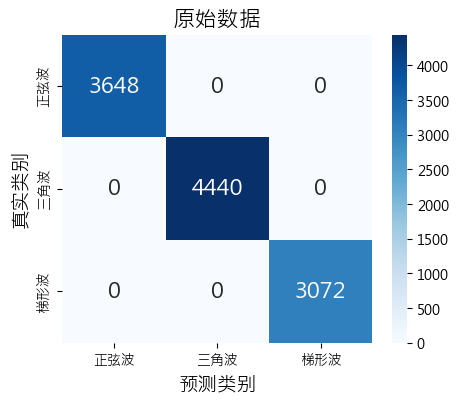

In [480]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['正弦波', '三角波', '梯形波']
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,annot_kws={'size': 16})
plt.title('原始数据', fontsize=16)
plt.xlabel('预测类别', fontsize=14)
plt.ylabel('真实类别', fontsize=14)

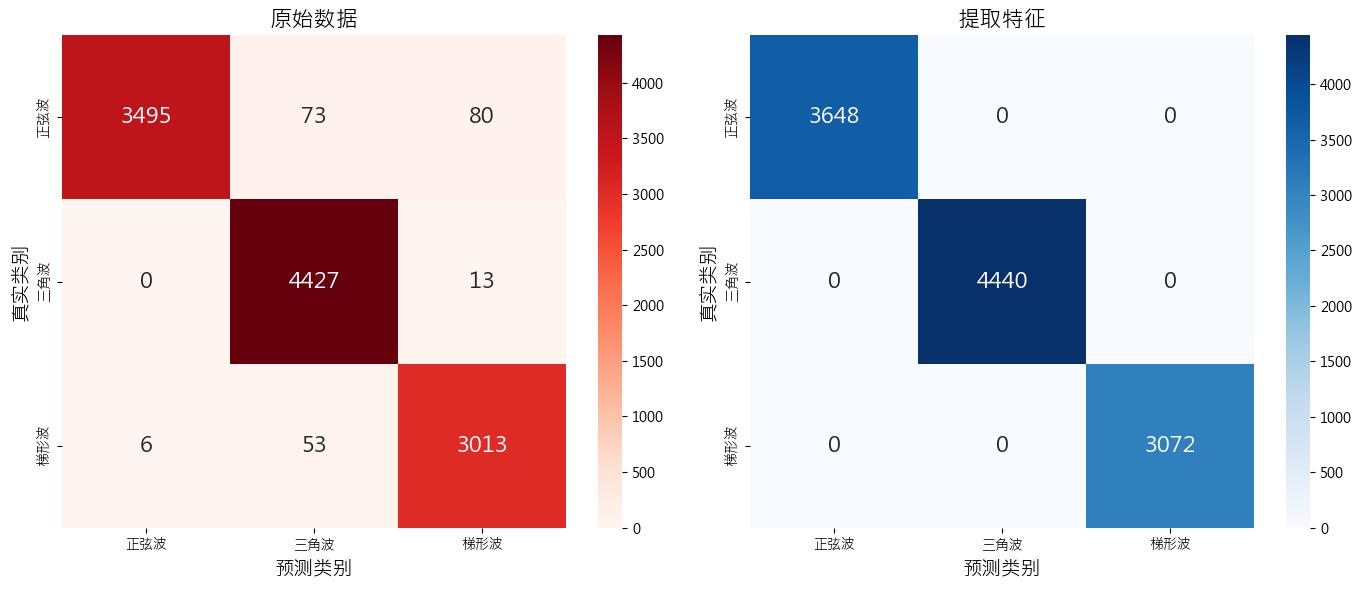

In [485]:
# print(X_train.head())


import seaborn as sns
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_ori)
cm2 = confusion_matrix(y_test, y_pred)

# 设置绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
class_names = ['正弦波', '三角波', '梯形波']

# 第一个混淆矩阵
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds', ax=axes[0], xticklabels=class_names, yticklabels=class_names,annot_kws={'size': 16})
axes[0].set_title('原始数据', fontsize=16)
axes[0].set_xlabel('预测类别', fontsize=14)
axes[0].set_ylabel('真实类别', fontsize=14)

# 第二个混淆矩阵
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=class_names, yticklabels=class_names,annot_kws={'size': 16})
axes[1].set_title('提取特征', fontsize=16)
axes[1].set_xlabel('预测类别', fontsize=14)
axes[1].set_ylabel('真实类别', fontsize=14)

# 显示图形
plt.tight_layout()
plt.show()

In [363]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [85]:
SVM(X_train, y_train, X_test, y_test)

预测结果: [1 1 2 ... 1 3 3]
实际结果: [1 1 2 ... 1 3 3]
模型准确率: 0.9536290322580645


In [84]:
RF(X_train, y_train, X_test, y_test)

预测结果: [1 1 2 ... 1 3 3]
实际结果: [1 1 2 ... 1 3 3]
预测与实际不符的索引： [  58  422  773 1332 1582 1806]
gt: 1 pred: 2 idx: 58
gt: 1 pred: 2 idx: 422
gt: 1 pred: 2 idx: 773
gt: 1 pred: 3 idx: 1332
gt: 1 pred: 2 idx: 1582
gt: 1 pred: 3 idx: 1806
模型准确率: 0.9975806451612903


In [503]:
test_real = pd.read_excel('附件二（测试集）.xlsx', sheet_name='测试集')
print(test_real.head())

   序号  温度，oC   频率，Hz   材料         0         1         2         3         4  \
0   1     25   56180  材料1 -0.101398 -0.099219 -0.097045 -0.094873 -0.092701   
1   2     25  125890  材料1 -0.031775 -0.031081 -0.030391 -0.029704 -0.029019   
2   3     25  224180  材料1 -0.066871 -0.065300 -0.063737 -0.062185 -0.060640   
3   4     25  282480  材料1 -0.023190 -0.022634 -0.022084 -0.021540 -0.020998   
4   5     50  199170  材料1 -0.077613 -0.075852 -0.074096 -0.072348 -0.070611   

          5  ...      1014      1015      1016      1017      1018      1019  \
0 -0.090534  ... -0.106739 -0.106970 -0.107198 -0.107405 -0.107564 -0.107633   
1 -0.028333  ... -0.034050 -0.034100 -0.034136 -0.034158 -0.034159 -0.034103   
2 -0.059101  ... -0.074207 -0.074200 -0.074168 -0.074077 -0.073844 -0.073352   
3 -0.020455  ... -0.027047 -0.027007 -0.026898 -0.026682 -0.026344 -0.025900   
4 -0.068883  ... -0.084331 -0.084361 -0.084376 -0.084366 -0.084294 -0.084046   

       1020      1021      1022      1023  


In [504]:
test_real = test_real.replace({'材料1': 1, '材料2': 2, '材料3': 3, '材料4': 4})

In [505]:
std, skewness, kurtosis, magnitude_max = new_features(test_real)

test_real['std'] = std
test_real['skewness'] = skewness
test_real['kurtosis'] = kurtosis
test_real['magnitude_max'] = magnitude_max

(80,) (80,)
(80, 1024)
(80,)
80


In [506]:
X_test_real = test_real.loc[:, '材料':'magnitude_max']
X_test_real = X_test_real.drop(columns=[c for c in range(1024)])
print(X_test_real.head())

   材料       std  skewness  kurtosis  magnitude_max
0   1  0.063275  0.023274 -1.198551       0.487587
1   1  0.020090  0.021784 -1.191926       0.154650
2   1  0.043969  0.018713 -1.196574       0.338202
3   1  0.016045  0.014647 -1.201482       0.123828
4   1  0.049874  0.018717 -1.197137       0.383961


In [507]:
y_pred_real = rf_model.predict(X_test_real)
print(y_pred_real)

[2 2 2 2 2 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 2 2
 2 2 2 3 2 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2
 2 1 1 1 1 1]


In [514]:
print(type(y_pred_real))
counts = np.bincount(y_pred_real)[1:4]  # 统计 1, 2, 3 的数量
print(counts)

<class 'numpy.ndarray'>
[20 44 16]


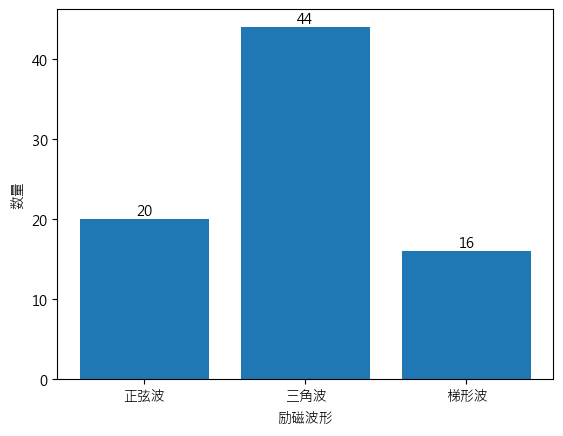

In [533]:
categories = ['正弦波', '三角波', '梯形波']
values = counts

# 创建柱状图
bars = plt.bar(categories, values)

# 添加标题和标签
# plt.title('三条柱状图示例')
plt.xlabel('励磁波形')
plt.ylabel('数量')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Add text on top of the bar

# 显示图形
plt.show()

In [531]:
for i in range(len(y_pred_real)):
    if i+1 in {1,5,15,25,35,45,55,65,75,80}:
        print(y_pred_real[i])

2
2
1
2
3
3
2
2
2
1


In [511]:
res1 = pd.DataFrame({'p1': y_pred_real})
print(res1)

    p1
0    2
1    2
2    2
3    2
4    2
..  ..
75   1
76   1
77   1
78   1
79   1

[80 rows x 1 columns]


In [512]:
res1.to_csv('res1.csv')

<h3>问题二</h3>

<h4>拟合SE</h4>

In [536]:
def SE(parms, f, B_m):
    k, a, b = parms
    return k * (f**a) * (B_m**b)

In [537]:
data = df['材料1']
data = data[data['励磁波形'] == '正弦波'].copy()

mv = data.loc[:, 0:1023].abs().max(axis=1)
data['B_m'] = mv

print(data.head(), data.shape)

   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形         0         1         2         3  \
0     25  50030  1997.955250  正弦波  0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波 -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波 -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波 -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波  0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1016      1017      1018      1019      1020  \
0  0.000919  0.001096  ... -0.001198 -0.001022 -0.000846 -0.000669 -0.000492   
1  0.000221  0.000413  ... -0.002091 -0.001899 -0.001707 -0.001515 -0.001322   
2 -0.002919 -0.002704  ... -0.005499 -0.005285 -0.005070 -0.004855 -0.004640   
3  0.000466  0.000711  ... -0.002463 -0.002220 -0.001976 -0.001732 -0.001488   
4  0.001555  0.001830  ... -0.001741 -0.001466 -0.001192 -0.000917 -0.000642   

       1021      1022      1023  材料       B_m  
0 -0.000

0       0.020410
1       0.022234
2       0.025119
3       0.028277
4       0.031828
          ...   
1062    0.030948
1063    0.034776
1064    0.039273
1065    0.044014
1066    0.049502
Length: 1067, dtype: float64
1067    0.044676
1068    0.056612
1069    0.071256
1070    0.088809
1071    0.100441
          ...   
3163    0.071871
3164    0.080809
3165    0.090125
3166    0.101479
3167    0.114090
Length: 1412, dtype: float64
2370    0.037030
2371    0.041816
2372    0.047257
2373    0.052431
2374    0.059222
          ...   
3395    0.016803
3396    0.021203
3397    0.023771
3398    0.033469
3399    0.037516
Length: 921, dtype: float64


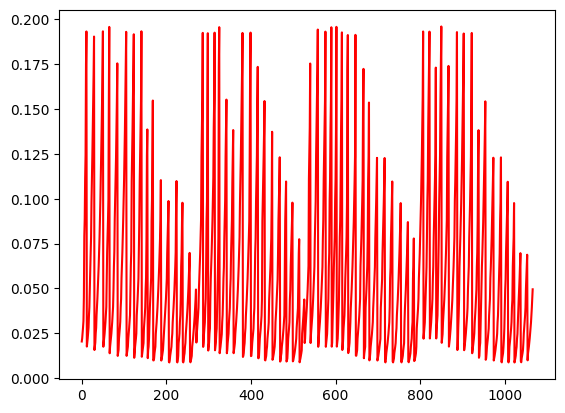

In [293]:
std1 = data.loc[:, 0:1023].std(axis=1)
print(std1)

data1 =df['材料1'][df['材料1']['励磁波形'] == '三角波'].copy()
data2 =df['材料1'][df['材料1']['励磁波形'] == '梯形波'].copy()

std2 = data1.loc[:, 0:1023].std(axis=1)
std3 = data2.loc[:, 0:1023].std(axis=1)
print(std2)
print(std3)

plt.plot(std1, color='red')


(3400, 1024)


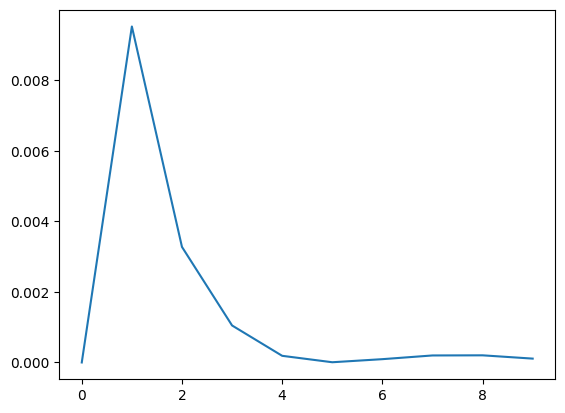

In [322]:
fft_result = np.fft.fft(df['材料1'].loc[:, 0:1023])
magnitude = np.abs(fft_result) / len(fft_result)
print(magnitude.shape)
plt.plot(magnitude[2500][:10])

In [538]:
parms = torch.tensor([0.3, 1.6, 2.5], dtype=torch.float32, requires_grad=True) #k, α, β
optimizer = torch.optim.AdamW([parms], lr=1)

for ep in range(10):
    for i in range(len(data)):
        optimizer.zero_grad()
        P_pre = SE(parms, data['频率，Hz'][i], data['B_m'][i])
        # print(P_pre)
        loss = (P_pre - data['磁芯损耗，w/m3'][i])**2
        print(f'ep:{ep},loss: {loss}, parms: {parms}')
        loss.backward()
        print(parms.grad)
        optimizer.step()

ep:0,loss: 357261.5625, parms: tensor([0.3000, 1.6000, 2.5000], requires_grad=True)
tensor([ -5579623.5000, -18112090.0000,   5935089.0000])
ep:0,loss: 1.1970482487448463e+20, parms: tensor([1.2970, 2.5840, 1.4750], requires_grad=True)
tensor([ 1.8459e+20,  2.5905e+21, -8.2838e+20])
ep:0,loss: 1.879839647957464e+19, parms: tensor([0.5399, 2.5582, 1.4602], requires_grad=True)
tensor([ 6.9638e+19,  4.0680e+20, -1.2547e+20])
ep:0,loss: 3.0301292515809034e+18, parms: tensor([-0.2293,  2.5326,  1.4456], requires_grad=True)
tensor([-2.6435e+19,  6.5573e+19, -1.9503e+19])
ep:0,loss: 3.050513867306382e+19, parms: tensor([-0.7698,  2.5073,  1.4312], requires_grad=True)
tensor([-7.9257e+19,  6.6015e+20, -1.8908e+20])
ep:0,loss: 8.369336495486743e+19, parms: tensor([-0.9862,  2.4822,  1.4169], requires_grad=True)
tensor([-1.6973e+20,  1.8112e+21, -4.6155e+20])
ep:0,loss: 1.7292253346107543e+20, parms: tensor([-0.8031,  2.4574,  1.4027], requires_grad=True)
tensor([-4.3064e+20,  3.7421e+21, -7.569

KeyboardInterrupt: 

In [539]:
data_log = data.copy()
data_log['B_m'] = np.log(data_log['B_m'])
data_log['磁芯损耗，w/m3'] = np.log(data_log['磁芯损耗，w/m3'])
data_log['频率，Hz'] = np.log(data_log['频率，Hz'])

print(data_log.head())

   温度，oC      频率，Hz  磁芯损耗，w/m3 励磁波形         0         1         2         3  \
0     25  10.820378   7.599880  正弦波  0.000213  0.000389  0.000566  0.000743   
1     25  10.820178   7.794720  正弦波 -0.000551 -0.000358 -0.000165  0.000028   
2     25  10.820178   8.111546  正弦波 -0.003780 -0.003564 -0.003349 -0.003134   
3     25  10.820178   8.412479  正弦波 -0.000511 -0.000267 -0.000023  0.000222   
4     25  10.820378   8.709964  正弦波  0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1016      1017      1018      1019      1020  \
0  0.000919  0.001096  ... -0.001198 -0.001022 -0.000846 -0.000669 -0.000492   
1  0.000221  0.000413  ... -0.002091 -0.001899 -0.001707 -0.001515 -0.001322   
2 -0.002919 -0.002704  ... -0.005499 -0.005285 -0.005070 -0.004855 -0.004640   
3  0.000466  0.000711  ... -0.002463 -0.002220 -0.001976 -0.001732 -0.001488   
4  0.001555  0.001830  ... -0.001741 -0.001466 -0.001192 -0.000917 -0.000642   

       1021      1022      1023  材料       B_

In [540]:
def fit(X, y):
    
    model = LinearRegression().fit(X, y)
    ln_k = model.intercept_  # 截距，对应 ln(eta)
    a = model.coef_[0]  # 对应频率的系数
    b = model.coef_[1]  # 对应磁通密度的系数
    
    # 计算 k
    k = np.exp(ln_k)
    
    print(f"拟合参数：\nk = {k}\na = {a}\nb = {b}")
    return k, a, b

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
X = np.column_stack((data_log['频率，Hz'], data_log['B_m']))
y = data_log['磁芯损耗，w/m3']
parms = fit(X, y)
loss_tot_mae = 0
p_pre = []
for i in range(len(data)):
    P_pre = SE(parms, data['频率，Hz'][i], data['B_m'][i])
    p_pre.append(P_pre)
    P_gt = data['磁芯损耗，w/m3'][i]
    loss = np.abs(P_pre - data['磁芯损耗，w/m3'][i])
    loss_tot_mae += loss
    print(f'loss: {loss}, P_pre: {P_pre}, P_gt: {P_gt}, t: {data["温度，oC"][i]}')
rmse = mean_squared_error(p_pre, data['磁芯损耗，w/m3'], squared=False)
r2 = r2_score(data['磁芯损耗，w/m3'], p_pre)
print(f'rmse: {rmse}, mae: {loss_tot_mae/len(data)}, r2:{r2}')

<h4>改进SE</h4>

271 256 265 275


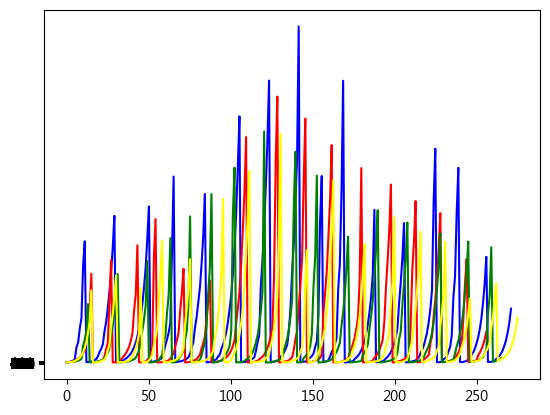

In [542]:
y1 = data[data['温度，oC'] == 25]['磁芯损耗，w/m3'].copy()
y2 = data[data['温度，oC'] == 50]['磁芯损耗，w/m3'].copy()
y3 = data[data['温度，oC'] == 70]['磁芯损耗，w/m3'].copy()
y4 = data[data['温度，oC'] == 90]['磁芯损耗，w/m3'].copy()

print(len(y1) , len(y2) , len(y3) , len(y4))
x1 = np.linspace(0, len(y1), len(y1))
x2 = np.linspace(0, len(y2), len(y2))
x3 = np.linspace(0, len(y3), len(y3))
x4 = np.linspace(0, len(y4), len(y4))

plt.figure()
yticks = [i for i in range(1000)]
plt.yticks(yticks)
plt.plot(x1,y1, color='blue')
plt.plot(x2,y2, color='red')
plt.plot(x3,y3, color='green')
plt.plot(x4,y4, color='yellow')

0       0.028849
1       0.031427
2       0.035535
3       0.040025
4       0.045085
          ...   
1062    0.043690
1063    0.049107
1064    0.055494
1065    0.062240
1066    0.070043
Name: B_m, Length: 1067, dtype: float64


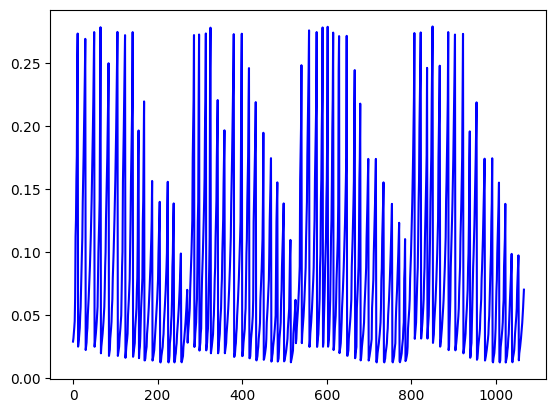

In [145]:
print(data['B_m'])
plt.figure()
plt.plot(data['B_m'], color='blue')

In [543]:
parm_list = []
temp = [25, 50, 70, 90]
for t in temp:
    data_log_temp = data_log[data_log['温度，oC'] == t].copy()
    # print(data_log_temp.shape)
    X = np.column_stack((data_log_temp['频率，Hz'], data_log_temp['B_m']))
    y = data_log_temp['磁芯损耗，w/m3']
    parm_list.append(fit(X,y))

拟合参数：
k = 7.654520424680421
a = 1.3150235927546488
b = 2.452547302285787
拟合参数：
k = 0.7367941114377303
a = 1.4963639946725498
b = 2.5214579156394215
拟合参数：
k = 0.02235959645994685
a = 1.7769409536995506
b = 2.5220129779798963
拟合参数：
k = 0.0029337173471484807
a = 1.9511502528612503
b = 2.575616540751335


[7.654520424680421, 0.7367941114377303, 0.02235959645994685, 0.0029337173471484807] [1.3150235927546488, 1.4963639946725498, 1.7769409536995506, 1.9511502528612503] [2.452547302285787, 2.5214579156394215, 2.5220129779798963, 2.575616540751335]
k = c0 * t**3 + c1* t**2 + c2* t c3, c0:-6.902327897894415e-05, c1:0.01536364938040952, c2:-1.1270059105275398, c3:27.305876059158937


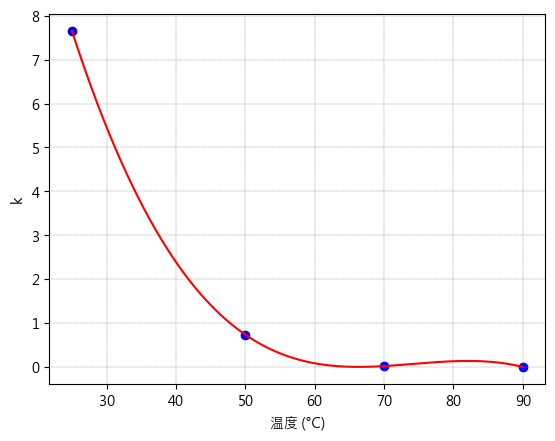

In [547]:
k_list, a_list, b_list = [p[0] for p in parm_list], [p[1] for p in parm_list], [p[2] for p in parm_list]
print(k_list, a_list, b_list)

x = np.array([25, 50, 70, 90])
degree = 3  # n次多项式拟合
coefficients = np.polyfit(x, k_list, degree)

c0, c1, c2, c3 = coefficients
# 使用拟合的多项式生成拟合曲线上的 y 值
# polynomial = np.poly1d(coefficients)
x_fit = np.linspace(25, 90, 1000)
k_fit = c0 * x_fit**3 + c1*x_fit**2 + c2*x_fit + c3

# 绘制散点图和拟合曲线
plt.scatter(x, k_list, color='blue', label='散点数据')
plt.plot(x_fit, k_fit, color='red', label=f'{degree} 次拟合曲线')
plt.xlabel('温度 (°C)')
plt.ylabel('k')
print(f'k = c0 * t**3 + c1* t**2 + c2* t c3, c0:{c0}, c1:{c1}, c2:{c2}, c3:{c3}')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
# plt.figure()
# plt.plot(k_list, color='blue')
# plt.figure()
# plt.plot(a_list, color='green')
# plt.figure()
# plt.plot(b_list, color='yellow')

a = c0 * t**3 + c1* t**2 + c2* t c3, c0:-4.3618505101050126e-06, c1:0.0007830290322904268, c2:-0.0323904653633565, c3:1.7035459958774344


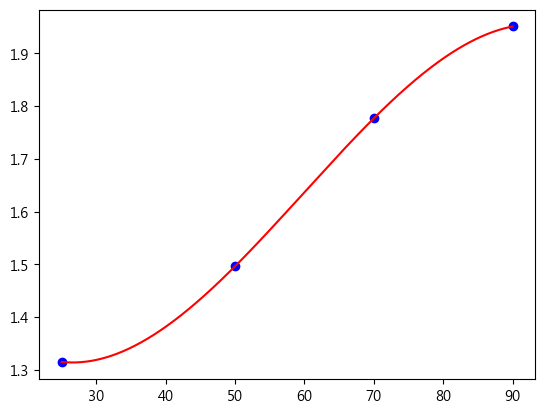

In [548]:
degree = 3
coefficients = np.polyfit(x, a_list, degree)

c0, c1, c2, c3 = coefficients

a_fit = c0 * x_fit**3 + c1*x_fit**2 + c2*x_fit + c3

plt.scatter(x, a_list, color='blue', label='散点数据')
plt.plot(x_fit, a_fit, color='red', label=f'{degree} 次拟合曲线')
print(f'a = c0 * t**3 + c1* t**2 + c2* t c3, c0:{c0}, c1:{c1}, c2:{c2}, c3:{c3}')

b = c0 * x_fit**3 + c1*x_fit**2 + c2*x_fit + c3, c0:1.9530425867909114e-06, c1:-0.00034382831768738623, c2:0.019998987043489118, c3:2.136949034334568


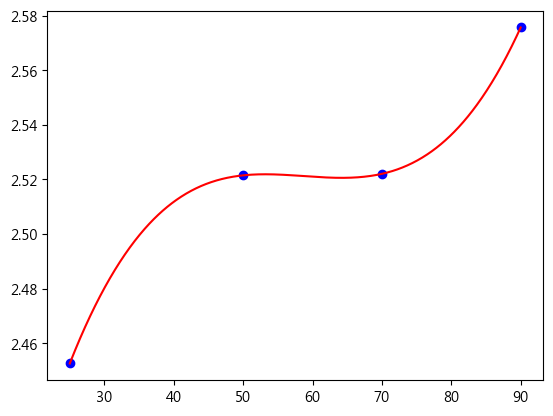

In [549]:
degree = 3
coefficients = np.polyfit(x, b_list, degree)

c0, c1, c2, c3 = coefficients

b_fit = c0 * x_fit**3 + c1*x_fit**2 + c2*x_fit + c3
# polynomial = np.poly1d(coefficients)
# b_fit = polynomial(x_fit)

plt.scatter(x, b_list, color='blue', label='散点数据')
plt.plot(x_fit, b_fit, color='red', label=f'{degree} 次拟合曲线')
print(f'b = c0 * x_fit**3 + c1*x_fit**2 + c2*x_fit + c3, c0:{c0}, c1:{c1}, c2:{c2}, c3:{c3}')

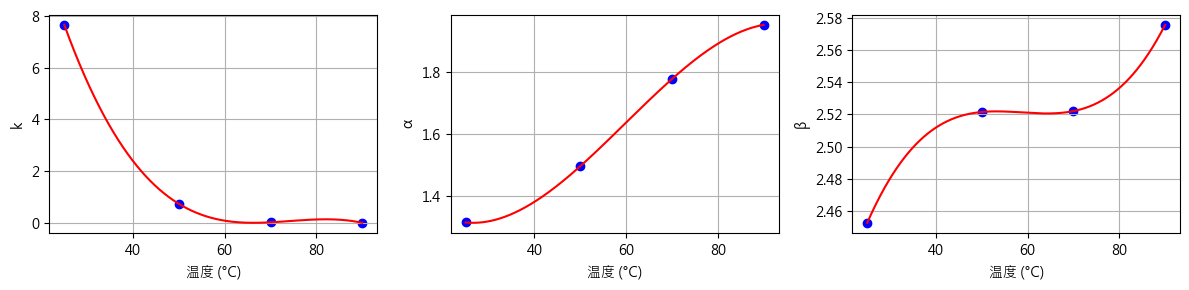

In [558]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# 绘制第一个子图
axs[0].scatter(x, k_list, color='blue', label='散点数据')
axs[0].plot(x_fit, k_fit, color='red', label=f'{degree} 次拟合曲线')
axs[0].set_xlabel('温度 (°C)')
axs[0].set_ylabel('k')
axs[0].grid(True)
# plt.scatter(x, k_list, color='blue', label='散点数据')
# plt.plot(x_fit, k_fit, color='red', label=f'{degree} 次拟合曲线')
# plt.xlabel('温度 (°C)')
# plt.ylabel('k')
# 绘制第二个子图
axs[1].scatter(x, a_list, color='blue', label='散点数据')
axs[1].plot(x_fit, a_fit, color='red', label=f'{degree} 次拟合曲线')
axs[1].set_xlabel('温度 (°C)')
axs[1].set_ylabel('α')
axs[1].grid(True)

# 绘制第三个子图
axs[2].scatter(x, b_list, color='blue', label='散点数据')
axs[2].plot(x_fit, b_fit, color='red', label=f'{degree} 次拟合曲线')
axs[2].set_xlabel('温度 (°C)')
axs[2].set_ylabel('β')
axs[2].grid(True)

# 调整布局
plt.tight_layout()
# plt.show()
# plt.scatter(s1.iloc[0].index, s1.iloc[0])
# 
# # 添加标签和标题
# plt.xlabel('时间')
# plt.ylabel('磁通密度')
# # plt.title('时间 vs 磁通密度的散点图')
# 
# plt.axhline(0, color='black',linewidth=0.3, ls='--')
# plt.axvline(0, color='black',linewidth=0.3, ls='--')
# 
# plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
# # plt.title('示例图像')
# # plt.xlabel('X 轴')
# # plt.ylabel('Y 轴')
# 
# # 显示图形
# plt.show()

In [560]:
def SE_pro(coefs, f, B_m, t):
    # k, a, b
    p = []
    for c in coefs:
        p.append(c[0]*(t**3) + c[1]*(t**2) + c[2]*t + c[3])
    return p[0] * (f**p[1]) * (B_m**p[2])

In [571]:
from sklearn.metrics import mean_squared_error, r2_score
# k : c0:-6.902327897894415e-05, c1:0.01536364938040952, c2:-1.1270059105275398, c3:27.305876059158937
# a : c0:-4.3618505101050126e-06, c1:0.0007830290322904268, c2:-0.0323904653633565, c3:1.7035459958774344
# b : c0:1.9530425867909114e-06, c1:-0.00034382831768738623, c2:0.019998987043489118, c3:2.136949034334568
coefs = [[-6.902327897894415e-05, 0.01536364938040952, -1.1270059105275398, 27.305876059158937],
         [-4.3618505101050126e-06, 0.0007830290322904268, -0.0323904653633565, 1.7035459958774344],
         [1.9530425867909114e-06, -0.00034382831768738623, 0.019998987043489118, 2.136949034334568]]
loss_tot_mae = 0
p_pre_pro = []
for i in range(len(data)):
    P_pre = SE_pro(coefs, data['频率，Hz'][i], data['B_m'][i], data['温度，oC'][i])
    p_pre_pro.append(P_pre)
    P_gt = data['磁芯损耗，w/m3'][i]
    loss = np.abs(P_pre - data['磁芯损耗，w/m3'][i])
    loss_tot_mae += loss
    print(f'loss: {loss}, P_pre: {P_pre}, P_gt: {P_gt}, t: {data["温度，oC"][i]}')
rmse = mean_squared_error(p_pre_pro, data['磁芯损耗，w/m3'], squared=False)
r2 = r2_score(data['磁芯损耗，w/m3'], p_pre_pro)
print(f'rmse: {rmse}, mae: {loss_tot_mae/len(data)}, r2:{r2}')

loss: 61.97475020817387, P_pre: 1935.980499791826, P_gt: 1997.95525, t: 25
loss: 40.06328360023872, P_pre: 2387.6865463997615, P_gt: 2427.74983, t: 25
loss: 105.63845480964346, P_pre: 3227.0873051903563, P_gt: 3332.72576, t: 25
loss: 182.15795282680028, P_pre: 4320.7500541732, P_gt: 4502.908007, t: 25
loss: 275.8011622718768, P_pre: 5787.222085728124, P_gt: 6063.023248, t: 25
loss: 894.8255692169241, P_pre: 13379.028640783075, P_gt: 14273.85421, t: 25
loss: 2429.0539571794943, P_pre: 53972.4755628205, P_gt: 56401.52952, t: 25
loss: 2262.228405077578, P_pre: 71389.08887492243, P_gt: 73651.31728, t: 25
loss: 84.70711450061935, P_pre: 125132.51931450062, P_gt: 125047.8122, t: 25
loss: 2412.1878644621465, P_pre: 164188.79376446214, P_gt: 161776.6059, t: 25
loss: 24174.48735490197, P_pre: 377160.11455490196, P_gt: 352985.6272, t: 25
loss: 38310.03612822911, P_pre: 480027.99852822913, P_gt: 441717.9624, t: 25
loss: 187.62961508476405, P_pre: 1571.3769499152359, P_gt: 1759.006565, t: 25
loss:

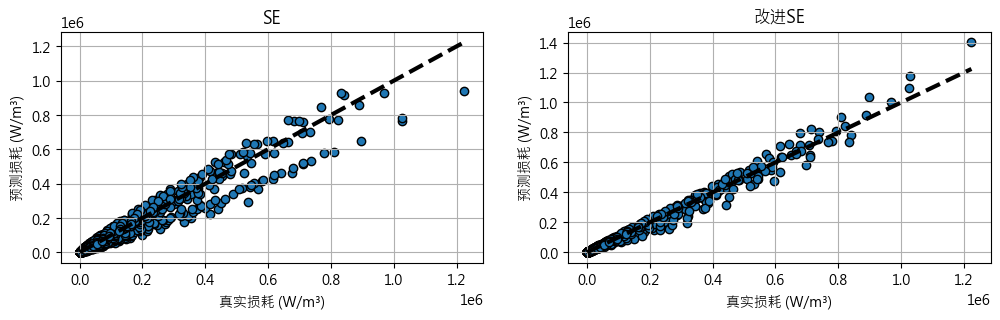

In [570]:
y_test = data['磁芯损耗，w/m3']
y_pred1 = p_pre
y_pred2 = p_pre_pro

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# 绘制第一个子图
axs[0].scatter(y_test, y_pred1, edgecolors=(0, 0, 0))
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[0].set_xlabel('真实损耗 (W/m³)')
axs[0].set_ylabel('预测损耗 (W/m³)')
axs[0].set_title('SE')
axs[0].grid(True)

axs[1].scatter(y_test, y_pred2, edgecolors=(0, 0, 0))
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[1].set_xlabel('真实损耗 (W/m³)')
axs[1].set_ylabel('预测损耗 (W/m³)')
axs[1].set_title('改进SE')
axs[1].grid(True)

# plt.figure(figsize=(10, 5))
# plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted - Stacking Model')
plt.show()

<h3>问题四</h3>

In [191]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
torch.manual_seed(2333)

In [7]:
# print(df1.head())
# train_test = df1.copy()
train_test = train_test.replace({'正弦波': 1, '三角波': 2, '梯形波': 3, 
                                 25: 1, 50: 2, 70: 3, 90: 4})
f_max = train_test['频率，Hz'].max()
train_test['频率，Hz'] = train_test['频率，Hz'] / f_max
train_test['B_m'] = train_test.loc[:, 0:1023].abs().max(axis=1)
# train_test = train_test.drop(columns=[c for c in range(1024) if (c)%1111 != 0])
print(train_test.head())

   温度，oC     频率，Hz    磁芯损耗，w/m3  励磁波形         0         1         2         3  \
0      1  0.099824  1997.955250     1  0.000213  0.000389  0.000566  0.000743   
1      1  0.099804  2427.749830     1 -0.000551 -0.000358 -0.000165  0.000028   
2      1  0.099804  3332.725760     1 -0.003780 -0.003564 -0.003349 -0.003134   
3      1  0.099804  4502.908007     1 -0.000511 -0.000267 -0.000023  0.000222   
4      1  0.099824  6063.023248     1  0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1016      1017      1018      1019      1020  \
0  0.000919  0.001096  ... -0.001198 -0.001022 -0.000846 -0.000669 -0.000492   
1  0.000221  0.000413  ... -0.002091 -0.001899 -0.001707 -0.001515 -0.001322   
2 -0.002919 -0.002704  ... -0.005499 -0.005285 -0.005070 -0.004855 -0.004640   
3  0.000466  0.000711  ... -0.002463 -0.002220 -0.001976 -0.001732 -0.001488   
4  0.001555  0.001830  ... -0.001741 -0.001466 -0.001192 -0.000917 -0.000642   

       1021      1022      1023 

In [355]:
std = train_test.loc[:, 0:1023].std(axis=1)
# 计算偏度（skewness）
skewness = train_test.loc[:, 0:1023].skew(axis=1)
# 计算峰度（kurtosis）
kurtosis = train_test.loc[:, 0:1023].kurt(axis=1)
# print(f"偏度（Skewness）：{skewness}")
print(skewness.shape, kurtosis.shape)

fft_result = np.fft.fft(train_test.loc[:, 0:1023])
# print(fft_result.shape)
magnitude = np.abs(fft_result) / len(fft_result)
print(magnitude.shape)
# plt.plot(magnitude[2500][:10])
magnitude_max = np.max(magnitude, axis=1)
print(magnitude_max.shape)
# a = magnitude[0][:len(magnitude[0])//2]
# print(a.shape, a[0])
# a = a**2
# print(a.shape, a[0])
# print(a.sum())
freq_energy = [(m[:len(m)//2]**2).sum() for m in magnitude]
print(len(freq_energy))

(3400,) (3400,)
(3400, 1024)
(3400,)
3400


In [356]:
train_test['std'] = std
train_test['skewness'] = skewness
train_test['kurtosis'] = kurtosis
train_test['magnitude_max'] = magnitude_max
# train_test['freq_energy'] = freq_energy

train_test = train_test.drop(columns=[c for c in range(1024)])
train_test = train_test.sample(frac=1).reset_index(drop=True)
l = len(train_test)
# print(train_test.head(), l)
train = train_test.iloc[:int(l*0.8)]
test = train_test.iloc[int(l*0.8):]
print(len(train), len(test))

2720 680


In [330]:
print(train.head(), train.shape)

   温度，oC     频率，Hz     磁芯损耗，w/m3  励磁波形  材料       B_m       std  skewness  \
0      1  0.199839  890439.63270     3   1  0.273107  0.166895  0.007427   
1      2  0.794292   19959.23490     2   1  0.013903  0.007982  0.013169   
2      4  0.158554   29969.86428     2   1  0.088216  0.050422  0.017122   
3      1  0.316458  114817.92510     3   1  0.086883  0.052838  0.012219   
4      1  0.446899  195279.96630     1   1  0.087775  0.062048 -0.004145   

   kurtosis  magnitude_max  
0 -1.329172       0.033363  
1 -1.200908       0.001446  
2 -1.196031       0.009140  
3 -1.327800       0.010561  
4 -1.501843       0.013207   (2720, 10)


In [357]:
import sys
y_train = train.loc[:, '磁芯损耗，w/m3']
X_train = train.drop(['磁芯损耗，w/m3'], axis=1)
y_test = test.loc[:, '磁芯损耗，w/m3']
X_test = test.drop(['磁芯损耗，w/m3'], axis=1)
print(X_train.head())

   温度，oC     频率，Hz  励磁波形  材料       B_m       std  skewness  kurtosis  \
0      1  0.446204     3   1  0.218499  0.133203  0.011755 -1.330301   
1      4  0.316458     3   1  0.242102  0.147512  0.011652 -1.329885   
2      4  0.158554     2   1  0.123678  0.070765  0.014250 -1.194682   
3      4  0.562801     3   1  0.027337  0.016677  0.010197 -1.332113   
4      1  0.888914     2   1  0.017449  0.010143 -0.004361 -1.200651   

   magnitude_max  
0       0.026628  
1       0.029472  
2       0.012824  
3       0.003336  
4       0.002122  


In [358]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [164]:
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# # 数据标准化
# scaler_X = StandardScaler()  # 特征标准化
# scaler_y = StandardScaler()  # 目标值标准化
# 
# X_train = scaler_X.fit_transform(X_train)
# X_test = scaler_X.transform(X_test)
# y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [309]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2720, 9) (2720,) (680, 9) (680,)


[0]	train-rmse:337016.14501	eval-rmse:319939.20137
[1]	train-rmse:332067.04104	eval-rmse:314786.68472
[2]	train-rmse:328616.28710	eval-rmse:311274.86052
[3]	train-rmse:324576.92069	eval-rmse:308104.32542
[4]	train-rmse:319727.80779	eval-rmse:303260.74892
[5]	train-rmse:314991.90211	eval-rmse:298504.18584
[6]	train-rmse:309778.77765	eval-rmse:293348.64497
[7]	train-rmse:304705.94360	eval-rmse:288437.28909
[8]	train-rmse:299822.34731	eval-rmse:283635.70757
[9]	train-rmse:296726.84743	eval-rmse:280362.03897
[10]	train-rmse:292572.56104	eval-rmse:276396.86789
[11]	train-rmse:287786.11419	eval-rmse:271747.75155
[12]	train-rmse:284704.12603	eval-rmse:268490.14601
[13]	train-rmse:280663.91851	eval-rmse:264571.08624
[14]	train-rmse:276027.41267	eval-rmse:260045.25509
[15]	train-rmse:272079.86216	eval-rmse:256134.79408
[16]	train-rmse:268337.06252	eval-rmse:252455.19035
[17]	train-rmse:265321.03622	eval-rmse:249463.44232
[18]	train-rmse:261674.71967	eval-rmse:245965.23953
[19]	train-rmse:259734

D:\PyCharm\workplace\Fed_Learn\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[56]	train-rmse:154690.15610	eval-rmse:146184.91135
[57]	train-rmse:152908.92297	eval-rmse:144618.69321
[58]	train-rmse:150569.44455	eval-rmse:142361.58148
[59]	train-rmse:148393.19938	eval-rmse:140247.95930
[60]	train-rmse:146227.83609	eval-rmse:138120.41030
[61]	train-rmse:144821.97991	eval-rmse:137353.53668
[62]	train-rmse:143266.98834	eval-rmse:136071.54861
[63]	train-rmse:141197.00003	eval-rmse:134181.92419
[64]	train-rmse:139520.85551	eval-rmse:132723.02496
[65]	train-rmse:137448.60961	eval-rmse:130745.64806
[66]	train-rmse:136250.16996	eval-rmse:130063.10870
[67]	train-rmse:134317.44159	eval-rmse:128347.38291
[68]	train-rmse:132720.44296	eval-rmse:126889.21262
[69]	train-rmse:130858.37843	eval-rmse:125150.18775
[70]	train-rmse:128965.67422	eval-rmse:123364.55237
[71]	train-rmse:127201.99923	eval-rmse:121872.22287
[72]	train-rmse:125762.94451	eval-rmse:120648.57926
[73]	train-rmse:124546.85290	eval-rmse:119884.65149
[74]	train-rmse:122747.04609	eval-rmse:118185.60021
[75]	train-r

D:\PyCharm\workplace\Fed_Learn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21169 (\N{CJK UNIFIED IDEOGRAPH-52B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyCharm\workplace\Fed_Learn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30913 (\N{CJK UNIFIED IDEOGRAPH-78C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyCharm\workplace\Fed_Learn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyCharm\workplace\Fed_Learn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyCharm\workplace\Fed_Learn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  

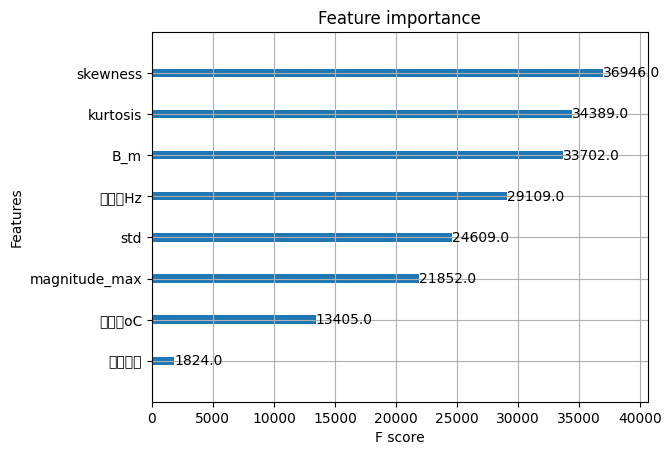

In [187]:
from xgboost import XGBRegressor

# sys.exit()
# y = train_test['磁芯损耗，w/m3']
# X = train_test.drop('磁芯损耗，w/m3', axis=1)

# 2. 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 将数据转换为DMatrix格式（XGBoost专用数据格式）
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 4. 设置XGBoost参数
params = {
    'objective': 'reg:squarederror',  # 回归问题的目标函数
    # 'max_depth': 6,                   # 树的最大深度
    # 'eta': 0.1,                       # 学习率
    # 'subsample': 0.8,                 # 子样本比例
    # 'colsample_bytree': 0.8,          # 每棵树使用的特征比例
    # 'eval_metric': 'rmse',            # 评价指标：均方根误差
    'seed': 42,                        # 随机种子
    # 'n_estimators': 1312,
    'learning_rate': 0.018279520260162645,
    'gamma': 0.0024196354156454324,
    'reg_alpha': 0.9025931173755949,
    'reg_lambda': 0.06835667255875388,
    'max_depth': 5,
    'min_child_weight': 5,
    'subsample': 0.883274050086088,
    'colsample_bytree': 0.6579828557036317
}

# 5. 训练XGBoost模型
num_round = 10000  # 迭代次数
watchlist = [(dtrain, 'train'), (dtest, 'eval')]  # 监视训练和测试集的表现
bst = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=100)
# xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# xgb_model.fit(X_train, y_train)

# 6. 预测并计算均方根误差（RMSE）
y_pred = bst.predict(dtest)
print(y_pred.shape)
# sys.exit()

# y_pred = scaler_y.fit_transform(y_pred.reshape(-1, 1)).flatten()
# y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
# print(y_pred)
# y_pred_train_original = scaler_y.inverse_transform(y_pred_train)
# y_pred_test_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
# print(y_pred_test_original)
# y_train_original = scaler_y.inverse_transform(y_train)
# y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()


rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.4f}")

# 7. 显示特征重要性（可选）
import matplotlib.pyplot as plt

xgb.plot_importance(bst)
plt.show()

stacking

In [219]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [8]:
train_test = train_test.drop(columns=[c for c in range(1024)])
train_test = train_test.sample(frac=1).reset_index(drop=True)
# l = len(train_test)
# # print(train_test.head(), l)
# train = train_test.iloc[:int(l*0.8)]
# test = train_test.iloc[int(l*0.8):]
# print(len(train), len(test))

In [9]:
print(train_test.head(), train_test.shape)

   温度，oC     频率，Hz     磁芯损耗，w/m3  励磁波形  材料       B_m
0      3  0.199469  3.245138e+03     3   1  0.034577
1      1  0.281895  1.296950e+06     3   1  0.242288
2      3  0.125743  7.357709e+04     1   3  0.125021
3      4  0.281875  1.862392e+04     3   1  0.054507
4      4  0.791751  1.507509e+04     2   1  0.011371 (12400, 6)


In [11]:
y = train_test.loc[:, '磁芯损耗，w/m3']
X = train_test.drop(columns=['磁芯损耗，w/m3'], axis=1)
X = X.loc[:, '温度，oC':'B_m'].copy()

# y_train = train.loc[:, '磁芯损耗，w/m3']
# X_train = train.drop(['磁芯损耗，w/m3'], axis=1)
# y_test = test.loc[:, '磁芯损耗，w/m3']
# X_test = test.drop(['磁芯损耗，w/m3'], axis=1)
print(X.head(), X.shape)

   温度，oC     频率，Hz  励磁波形  材料       B_m
0      3  0.199469     3   1  0.034577
1      1  0.281895     3   1  0.242288
2      3  0.125743     1   3  0.125021
3      4  0.281875     3   1  0.054507
4      4  0.791751     2   1  0.011371 (12400, 5)


In [658]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1e-6, random_state=42)

In [12]:
X_train, y_train = X, y

In [13]:
print(X_train.shape)

(12400, 5)


In [14]:
print(y)

0        3.245138e+03
1        1.296950e+06
2        7.357709e+04
3        1.862392e+04
4        1.507509e+04
             ...     
12395    1.226931e+04
12396    1.502760e+05
12397    6.524477e+05
12398    8.445259e+05
12399    5.798196e+03
Name: 磁芯损耗，w/m3, Length: 12400, dtype: float64


In [16]:
X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

In [664]:
print(X_train[0:5])

[[5.00000000e+01 1.58750000e+05 3.00000000e+00 2.00000000e+00
  1.94231720e-02]
 [5.00000000e+01 6.30200000e+04 1.00000000e+00 4.00000000e+00
  1.12474432e-01]
 [9.00000000e+01 2.82480000e+05 3.00000000e+00 1.00000000e+00
  5.47444770e-02]
 [7.00000000e+01 1.25860000e+05 1.00000000e+00 1.00000000e+00
  2.19287810e-02]
 [9.00000000e+01 5.61800000e+04 2.00000000e+00 1.00000000e+00
  6.85804110e-02]]


In [616]:
svr = SVR(kernel='rbf', C=1000, epsilon=0.01)
scaler_X = StandardScaler()  # 特征标准化
scaler_y = StandardScaler()  # 目标值标准化

X_train_ = scaler_X.fit_transform(X_train)
X_test_ = scaler_X.transform(X_test)
y_train_ = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test_ = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
# 训练模型
svr.fit(X_train_[:3000], y_train_[:3000])

SVR(C=1000, epsilon=0.01)

In [617]:
# 进行预测
y_pred_train = svr.predict(X_train_)
y_pred_test = svr.predict(X_test_)

# 反标准化预测值（将预测值转换为原始尺度）
y_pred_train_original = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_original = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
# y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
# y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 计算评估指标
rmse = mean_squared_error(y_test, y_pred_test_original, squared=False)
mae = mean_absolute_error(y_test, y_pred_test_original)
r2 = r2_score(y_test, y_pred_test_original)

print(f'RMSE: {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

RMSE: 51964.7282
Mean Absolute Error (MAE): 20425.9437
R-squared (R2): 0.9809


In [365]:
print(y_test[0:5])
print(y_pred_test_original[0:5])


[ 11581.25487    2008.202927 175199.1725    16030.01603   12638.50856 ]
[ 11372.51179232   1336.38801024 175129.48358968  13538.35098266
  12100.8787853 ]


In [18]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

In [298]:
xgboost = XGBRegressor(n_estimators=233, learning_rate=0.01, max_depth=5, objective='reg:squarederror', random_state=42,
                       gamma=0.0024196354156454324, reg_alpha=0.9025931173755949, reg_lambda=0.06835667255875388,min_child_weight=5, subsample=0.883274050086088, colsample_bytree=0.6579828557036317)
rf = RandomForestRegressor(n_estimators=1000, max_depth=17, random_state=42)
svr = SVR(kernel='rbf', C=1000, epsilon=0.01)
lr = LinearRegression()
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=10000, random_state=42)
# xgboost.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
stacking_model = StackingRegressor(
    estimators=[('svr', svr), ('xgboost', xgboost)],  # 定义基模型
    final_estimator=ridge,  # 定义元学习器
    cv=5  # 交叉验证折数
)

stacking_model.fit(X_train_, y_train_)

StackingRegressor(cv=5,
                  estimators=[('svr', SVR(C=1000, epsilon=0.01)),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6579828557036317,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.0024196354156454324,
                                            grow_...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=5,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=233, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Ridge())

In [574]:
# 在测试集上进行预测
y_pred = stacking_model.predict(X_test_)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# 评估模型性能
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

ValueError: X has 1025 features, but SVR is expecting 10 features as input.

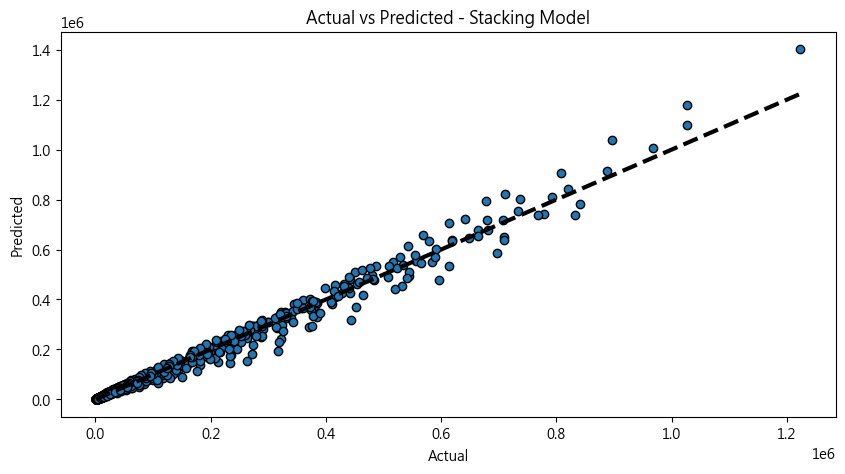

In [573]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Stacking Model')
plt.show()

<h3>问题五</h3>

In [596]:
print(df1.head())

   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形         0         1         2         3  \
0     25  50030  1997.955250  正弦波  0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波 -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波 -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波 -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波  0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1015      1016      1017      1018      1019  \
0  0.000919  0.001096  ... -0.001374 -0.001198 -0.001022 -0.000846 -0.000669   
1  0.000221  0.000413  ... -0.002284 -0.002091 -0.001899 -0.001707 -0.001515   
2 -0.002919 -0.002704  ... -0.005713 -0.005499 -0.005285 -0.005070 -0.004855   
3  0.000466  0.000711  ... -0.002707 -0.002463 -0.002220 -0.001976 -0.001732   
4  0.001555  0.001830  ... -0.002016 -0.001741 -0.001466 -0.001192 -0.000917   

       1020      1021      1022      1023  材料  
0 -0.000

In [601]:
import nevergrad as ng

In [615]:
fetures = [1, 60000, 1, 0.02, 4] #温度、频率、波形、磁通密度峰值、磁芯材料
ep = 1000
parametrization = ng.p.Array(init=fetures)
optimizer = ng.optimizers.CMA(parametrization=parametrization, budget=100)
for e in range(1000):
    ng_data = [optimizer.ask() for _ in range(10)]
    loss = []
    for d in ng_data:
        # print(d.value)
        pre = svr.predict(d.value.reshape(1, -1))
        loss_ = pre - d.value[1]*d.value[3] * 1e-5
        loss.append(float(loss_))
    for z, l in zip(ng_data, loss):
        optimizer.tell(z, l)
    # pre = svr.predict(fetures)
    # loss = pre - fetures[1]*fetures[3]
    res = optimizer.provide_recommendation().value
    print(f'[{e+1}], fetures:{res}, loss:{np.mean(loss)}')
    

[1], fetures:[1.30348990e+00 5.99999991e+04 5.50659543e-01 7.27970257e-01
 3.82810509e+00], loss:4.614595958209109
[2], fetures:[6.05786837e-01 5.99998802e+04 1.19599039e+00 9.22073227e-01
 2.79271486e+00], loss:4.544419353041019
[3], fetures:[9.84084795e-01 5.99994847e+04 1.04399183e-01 9.28213786e-01
 3.74292379e+00], loss:4.334393471369573
[4], fetures:[1.31456487e+00 5.99999298e+04 5.29789567e-01 1.33293276e+00
 3.11551635e+00], loss:4.231581294371254
[5], fetures:[1.83041060e+00 5.99991430e+04 5.30379815e-01 2.07883428e+00
 3.99726508e+00], loss:3.773379168952303
[6], fetures:[1.83041060e+00 5.99991430e+04 5.30379815e-01 2.07883428e+00
 3.99726508e+00], loss:3.7790758700402627
[7], fetures:[1.50477287e+00 5.99995095e+04 1.60209601e+00 2.19939521e+00
 3.64263420e+00], loss:3.514594648794266
[8], fetures:[8.89344909e-02 5.99984195e+04 1.28879959e+00 2.45304825e+00
 4.19649663e+00], loss:3.444909953517385
[9], fetures:[-9.21182840e-02  5.99984306e+04  2.47500833e+00  3.87577434e+00
 

In [15]:
print(X_train.shape)
print(y_train.shape)

(12400, 5)
(12400,)


In [19]:
scaler_X = StandardScaler()  # 特征标准化
scaler_y = StandardScaler()  # 目标值标准化

X_train = scaler_X.fit_transform(X_train)
# X_test_ = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize


# 构建回归模型
model = SVR(kernel='rbf', C=1000, epsilon=0.01)
model.fit(X_train, y_train)

# 定义目标函数
def objective(params):
    temperature, frequency, wave, B_peak, mt = params
    core_loss = model.predict(np.array([[temperature, frequency, wave, B_peak, mt]]))[0]
    transmission_energy = frequency * B_peak  # 传输磁能
    return core_loss - 0.1 * transmission_energy  # 权重系数

# 初始猜测
initial_guess = [80, 60000, 1, 0.02, 4]#温度、频率、波形、磁通密度峰值、磁芯材料

# 约束条件
bounds = [(25, 90), (5e4, 5e5), (1, 4), (1e-2, 0.485), (1, 4)]

# 优化
result = minimize(objective, initial_guess, bounds=bounds)

# 输出结果
optimal_params = result.x
print("最优参数:")
print(f"温度: {optimal_params[0]:.2f}, 频率: {optimal_params[1]:.2f}, 波形: {optimal_params[2]:.2f},磁通密度峰值: {optimal_params[3]:.2f}, 磁芯材料: {optimal_params[4]:.2f}")
print(f"最小磁芯损耗: {model.predict(np.array([optimal_params]))[0]:.4f}")

最优参数:
温度: 80.00, 频率: 500000.00, 波形: 1.00,磁通密度峰值: 0.48, 磁芯材料: 4.00
最小磁芯损耗: 4.2148


In [23]:
plt.scatter(s1.iloc[0].index, s1.iloc[0])

# 添加标签和标题
plt.xlabel('时间')
plt.ylabel('磁通密度')
# plt.title('时间 vs 磁通密度的散点图')

plt.axhline(0, color='black',linewidth=0.3, ls='--')
plt.axvline(0, color='black',linewidth=0.3, ls='--')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
# plt.title('示例图像')
# plt.xlabel('X 轴')
# plt.ylabel('Y 轴')

# 显示图形
plt.show()

NameError: name 's1' is not defined

In [671]:
print(y.shape)

(12400,)


In [673]:
print(X)

       温度，oC   频率，Hz  励磁波形  材料       B_m
0         50  158750     3   2  0.019423
1         50   63020     1   4  0.112474
2         90  282480     3   1  0.054744
3         70  125860     1   1  0.021929
4         90   56180     2   1  0.068580
...      ...     ...   ...  ..       ...
12395     25  396820     2   4  0.048613
12396     50  316450     2   4  0.017518
12397     25  199170     2   2  0.061996
12398     70  281850     1   1  0.044116
12399     25  251230     2   4  0.017466

[12400 rows x 5 columns]


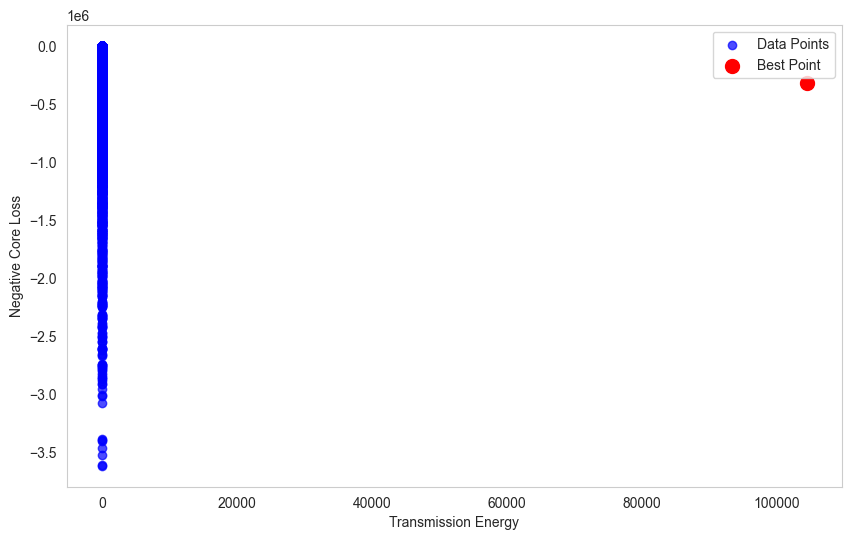

In [24]:
# ransmission_energy = np.random.uniform(1e3, 1e5, 100)
# # 假设的磁芯损耗数据
# core_loss = np.random.uniform(0.01, 0.1, 100)

# 计算磁芯损耗的相反数
negative_core_loss = -y

# 最佳参数
best_transmission_energy = 104353.92  # 最佳传输磁能
# best_core_loss = 0.02              # 最佳磁芯损耗
best_negative_core_loss = -317235.62

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(X['频率，Hz']*X['B_m'], negative_core_loss, color='blue', alpha=0.7, label='Data Points')
plt.scatter(best_transmission_energy, best_negative_core_loss, color='red', s=100, label='Best Point')
# plt.title('Scatter Plot of Transmission Energy vs. Negative Core Loss')
plt.xlabel('Transmission Energy')
plt.ylabel('Negative Core Loss')
plt.grid()
plt.legend()
plt.show()